In [1]:
import random 
import pandas as pd
import numpy as np

In [2]:
cars = pd.read_csv('porsche_cars.csv')

In [3]:
cars.drop(columns=cars.columns[0], axis = 1, inplace = True)
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295 entries, 0 to 1294
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Марка                   1295 non-null   object 
 1   Модель                  1295 non-null   object 
 2   Год выпуска             1295 non-null   int64  
 3   Город продажи           1295 non-null   object 
 4   Тип топлива             1286 non-null   object 
 5   Объем двигателя, л.     1276 non-null   float64
 6   Мощность, л.с.          1293 non-null   float64
 7   Коробка передач         1293 non-null   object 
 8   Привод                  1293 non-null   object 
 9   Цвет                    1277 non-null   object 
 10  Пробег, км              1224 non-null   float64
 11  Поколение               1255 non-null   object 
 12  Количество регистраций  1072 non-null   float64
 13  Цена, руб.              1295 non-null   int64  
dtypes: float64(4), int64(2), object(8)
memor

### Создаем классы автомобилей в зависимости от цены
Параметр цены не будем включать в обучение 

In [4]:
prices = cars['Цена, руб.']

In [5]:
def price_classification(prices):
    class_cars = []
    for i in range(len(prices)):
        if prices[i] < 1500000:
            class_cars.append('F')
        elif 1500000 <= prices[i] <= 3500000:
            class_cars.append('E')
        elif 3500000 <= prices[i] <= 5500000:
            class_cars.append('D')
        elif 5500000 <= prices[i] <= 8000000:
            class_cars.append('C')
        elif 8000000 <= prices[i] <= 11000000:
            class_cars.append('B')
        else:
            class_cars.append('A')
    return class_cars

In [6]:
class_cars = price_classification(prices)
cars['Классификация цены'] = class_cars

### Обработка данных

In [7]:
cars.loc[cars['Модель'] == 'Taycan', 'Тип топлива'] = 'электро'
cars.loc[cars['Модель'] == 'Taycan', 'Объем двигателя, л.'] = 0
cars.loc[cars['Коробка передач'] == 'автомат', 'Коробка передач'] = 'АКПП' 
cars.loc[cars['Пробег, км'] == 0, 'Количество регистраций'] = 0

In [8]:
cars2 = cars.copy(deep = True) # копировани массива, чтобы значения были независисмы

### Удаление столбцов 

In [9]:
cars2.drop(columns=cars2.columns[0], axis = 1, inplace = True)
cars2.drop(columns=cars2.columns[0], axis = 1, inplace = True)
cars2.drop(columns=cars2.columns[1], axis = 1, inplace = True)
cars2.drop(columns=cars2.columns[1], axis = 1, inplace = True)
cars2.drop(columns=cars2.columns[3], axis = 1, inplace = True)
cars2.drop(columns=cars2.columns[3], axis = 1, inplace = True)
cars2.drop(columns=cars2.columns[3], axis = 1, inplace = True)
cars2.drop(columns=cars2.columns[4], axis = 1, inplace = True)
cars2.drop(columns=cars2.columns[5], axis = 1, inplace = True)
cars2

,Год выпуска,"Объем двигателя, л.","Мощность, л.с.","Пробег, км",Количество регистраций,Классификация цены
0,2014,3.6,400.0,87000.0,1.0,D
1,2019,3.0,340.0,101156.0,3.0,C
2,2015,3.6,310.0,61000.0,5.0,D
3,2007,4.8,385.0,265000.0,4.0,F
4,2022,3.0,340.0,0.0,0.0,A
...,...,...,...,...,...,...
1290,2015,3.0,245.0,98000.0,5.0,D
1291,2006,4.5,340.0,250000.0,8.0,F
1292,2022,3.0,340.0,9785.0,1.0,A
1293,2011,4.8,400.0,182000.0,9.0,E


### Удаление пропусков 

In [10]:
cars2 = cars2.dropna()
len(cars2)

1056

### Создаем обучающую и тестовую выборку

In [11]:
labels = cars2[cars2.columns[-1]].values
feature_matrix = cars2[cars2.columns[:-1]].values

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(
    feature_matrix, labels, test_size=0.2, random_state=42)

### Имортируем модели

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [15]:
clf = DecisionTreeClassifier(max_depth = 3, random_state=42)
clf = clf.fit(train_feature_matrix, train_labels)
y_pred = clf.predict(test_feature_matrix)

### Строим дерево решений 

In [16]:
from sklearn import tree
import matplotlib.pyplot as plt

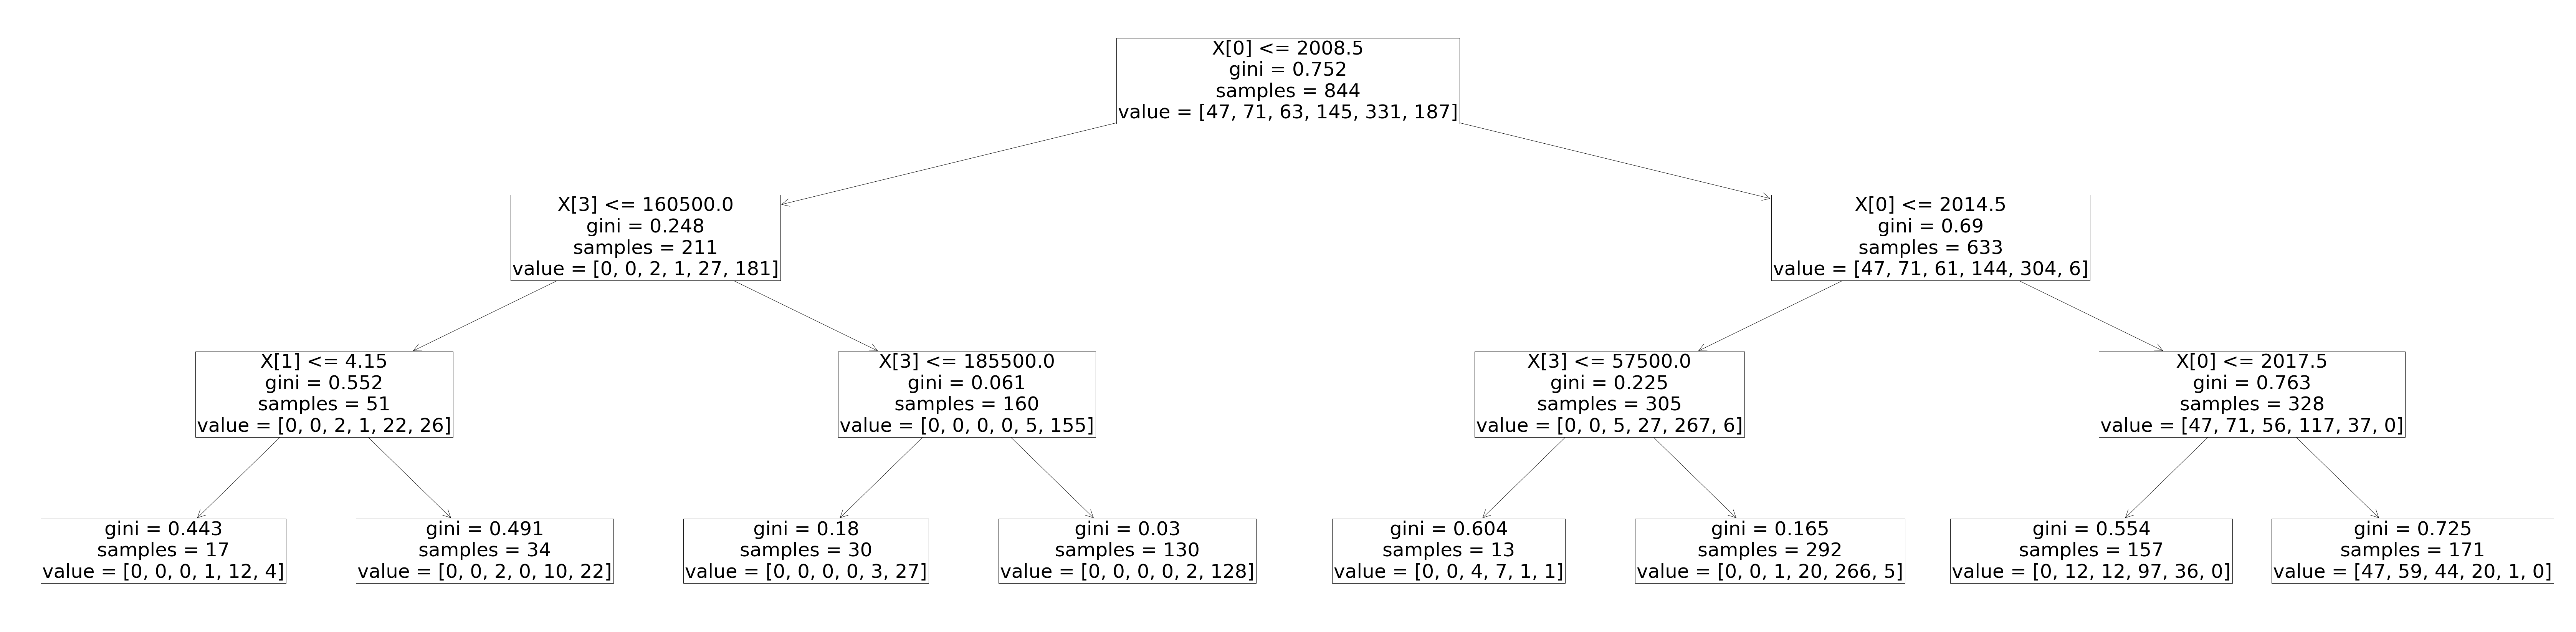

In [17]:
plt.figure(figsize=(120,30))  # set plot size (denoted in inches)
tree.plot_tree(clf, fontsize=50)
plt.show()

### Нормируем данные и строим логистическую регрессию 

In [18]:
from sklearn import preprocessing

In [19]:
scaler = preprocessing.StandardScaler().fit(train_feature_matrix)
scaler
X_scaled = scaler.transform(train_feature_matrix)

In [20]:
clf2 = LogisticRegression(random_state=42)
clf2 = clf2.fit(X_scaled, train_labels)
scaled_test_matrix = scaler.transform(test_feature_matrix)
y_pred2 = clf2.predict(scaled_test_matrix)

In [21]:
clf2.predict_proba(scaled_test_matrix)

array([[3.07794301e-04, 3.45905850e-02, 1.83751911e-01, 4.69861509e-01,
        3.11205612e-01, 2.82587919e-04],
       [5.62138616e-13, 3.75259813e-08, 2.51827499e-05, 6.98223992e-03,
        8.34358630e-01, 1.58633910e-01],
       [8.81174425e-16, 3.46634576e-10, 7.23157368e-08, 1.19747580e-05,
        3.17179636e-02, 9.68269989e-01],
       ...,
       [1.89071493e-01, 4.50348385e-01, 2.49219096e-01, 1.09231475e-01,
        2.12950194e-03, 4.77273214e-08],
       [5.25101236e-06, 1.48740110e-03, 1.03390786e-02, 1.50445708e-01,
        7.83759294e-01, 5.39632676e-02],
       [2.51841142e-13, 6.58514720e-08, 1.71140259e-06, 3.06227926e-04,
        1.68143022e-01, 8.31548973e-01]])

### Строим KNN

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
clf3 = KNeighborsClassifier(n_neighbors = 1)

params = {'n_neighbors': [2, 3, 4, 5, 6],
         'metric': ['manhattan', 'euclidean'],
         'weights': ['uniform', 'distance']}

clf3_grid = GridSearchCV(clf3, params, cv=5, scoring='accuracy', n_jobs=-1)
clf3_grid = clf3_grid.fit(train_feature_matrix, train_labels)

print(clf3_grid.best_params_)

{'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'uniform'}


In [24]:
y_pred3 = clf3_grid.predict(test_feature_matrix)

In [25]:
from sklearn.metrics import accuracy_score

#### Точнось дерева решений

In [26]:
accuracy_score(test_labels, y_pred) 

0.8018867924528302

#### Точность логистической регрессии 

In [27]:
accuracy_score(test_labels, y_pred2)

0.75

#### Точность KNN

In [28]:
accuracy_score(test_labels, y_pred3)

0.5188679245283019

### Ансамбль 
В процессе ... 

In [69]:
from sklearn.ensemble import VotingClassifier

In [70]:
eclf1 = VotingClassifier(estimators=[('dt', clf), ('lr', clf2), ('knn', clf3_grid)], voting = 'hard')

In [72]:
eclf1.fit(train_feature_matrix, train_labels)
y_pred4 = eclf1.predict(test_feature_matrix)

/Users/leontijcukanov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [73]:
accuracy_score(test_labels, y_pred4)

0.6226415094339622

In [21]:
from sklearn.metrics import f1_score

In [27]:
f1_score(test_labels, y_pred, average='macro')

0.5197807043140608

In [32]:
from sklearn.metrics import classification_report

In [34]:
print(classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

           A       0.00      0.00      0.00         7
           B       0.36      0.92      0.52        13
           C       0.00      0.00      0.00        15
           D       0.66      0.75      0.70        36
           E       0.93      0.90      0.92        90
           F       0.98      0.98      0.98        51

    accuracy                           0.80       212
   macro avg       0.49      0.59      0.52       212
weighted avg       0.77      0.80      0.78       212



/Users/leontijcukanov/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/leontijcukanov/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/leontijcukanov/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r